Random Forest는 여러개의 Decision Tree를 사용하는 Ensemble 모델입니다. 
이를 통해 모델을 Robust하게 만듭니다

https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [2]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [4]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:,1:].values
y = df_wine['Class label'].values


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [7]:
forest = RandomForestClassifier()

In [8]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

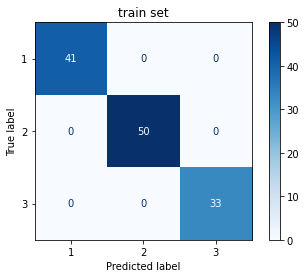

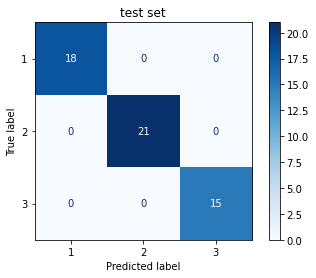

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest, X_train, y_train,                                 
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('train set')
plt.show()

plot_confusion_matrix(forest, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('test set')
plt.show()

In [16]:
estimator = forest.estimators_[2]

In [17]:
from sklearn import tree
dot_data = tree.export_graphviz(estimator, feature_names=df_wine.columns[1:])

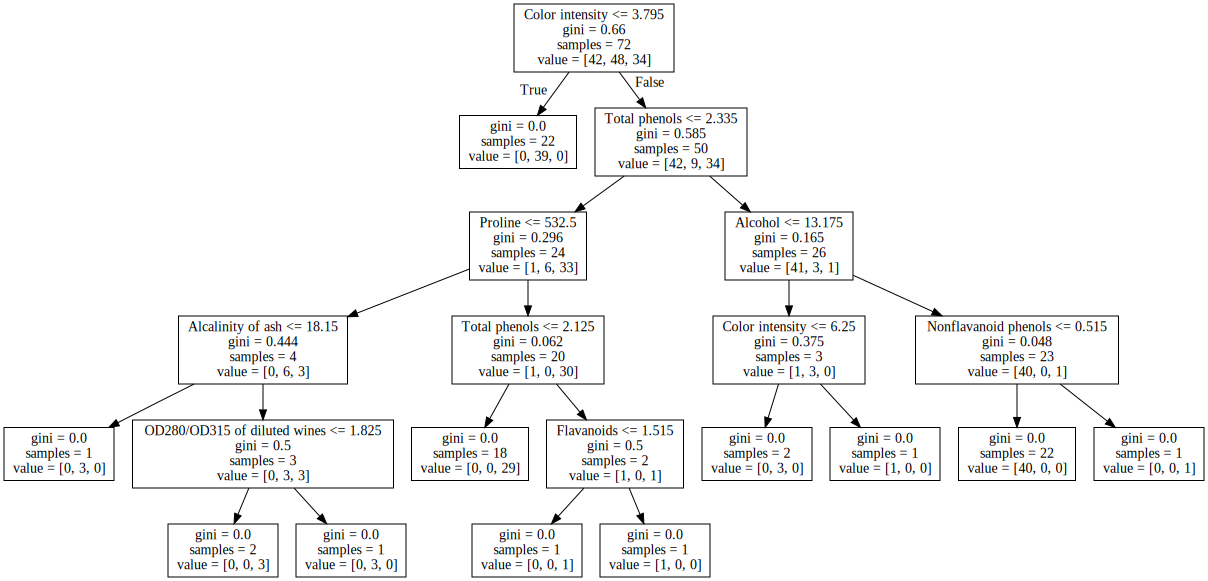

In [18]:
import graphviz
graph = graphviz.Source(dot_data)  
graph

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

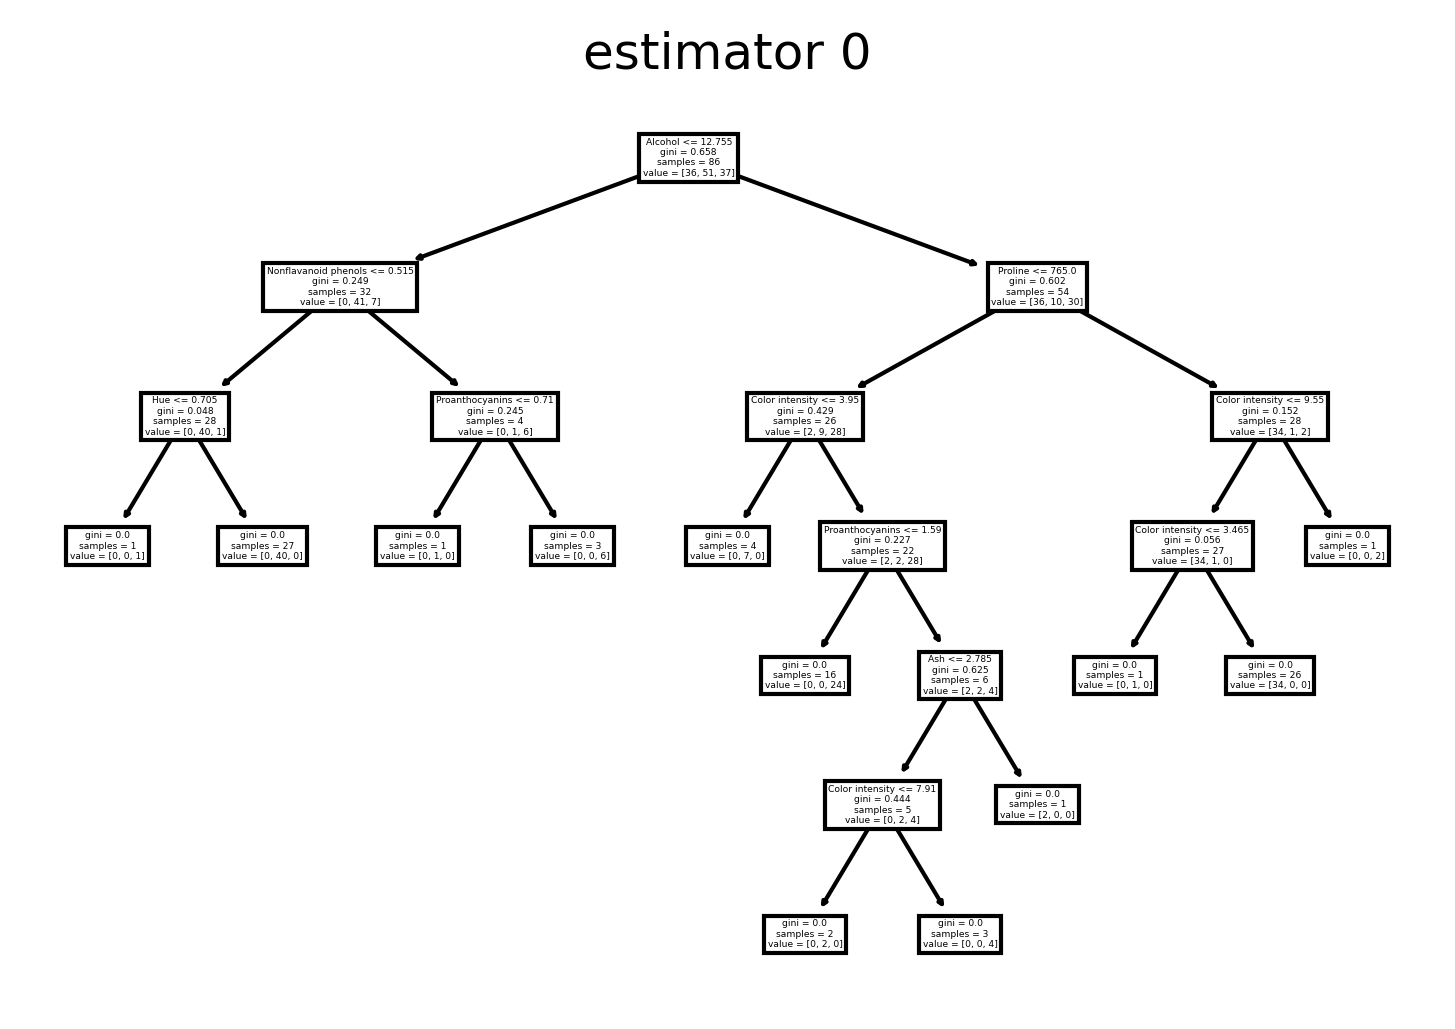

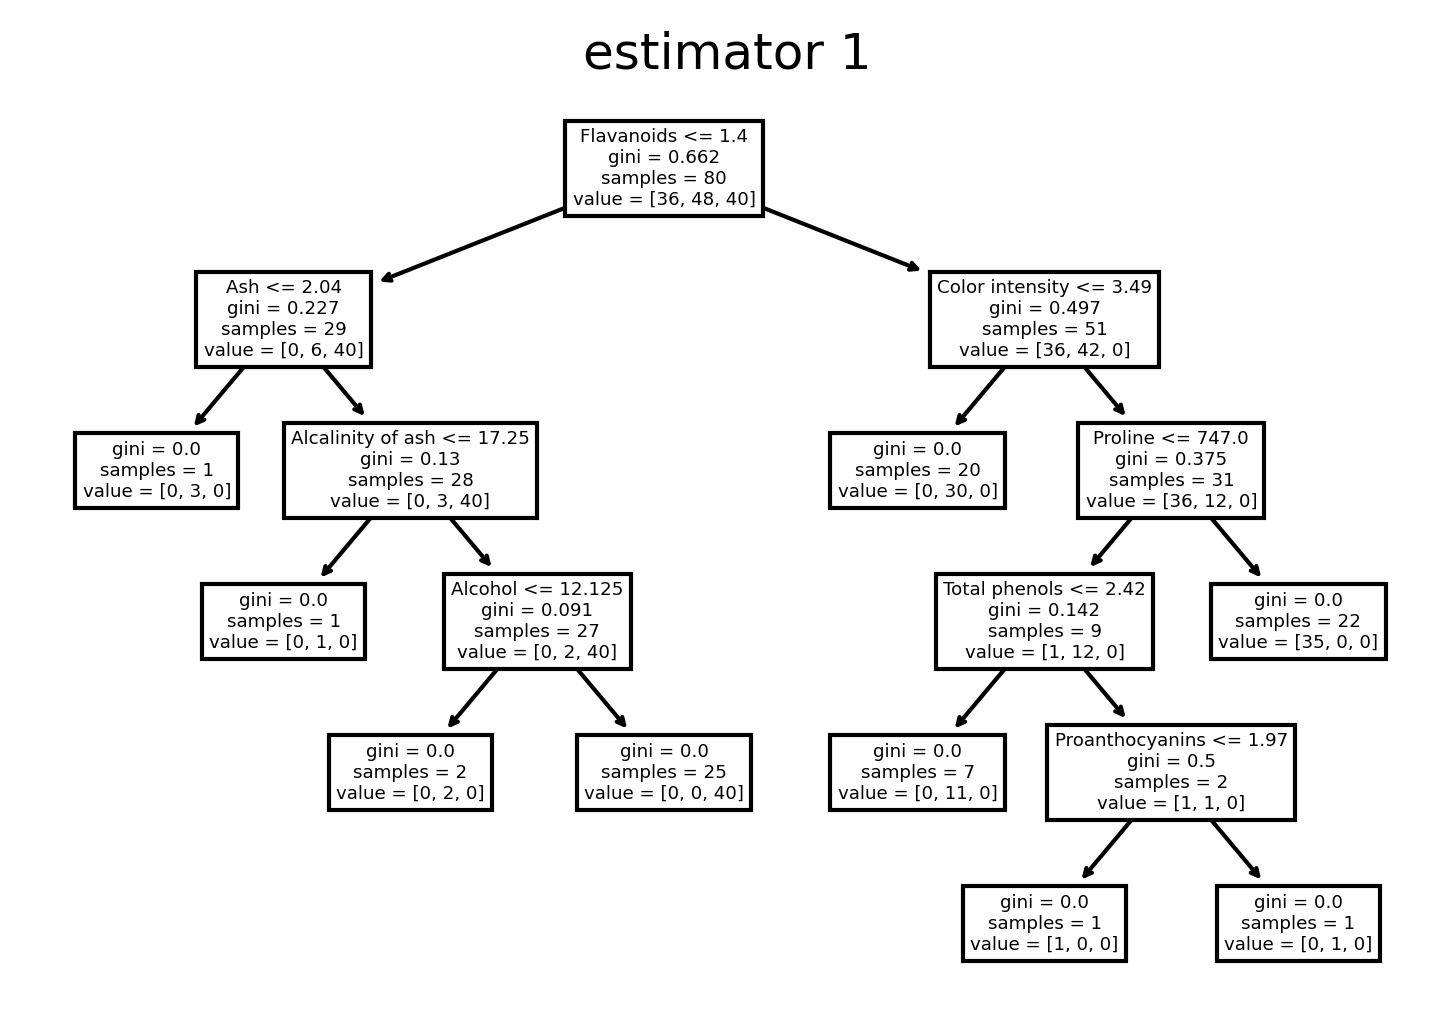

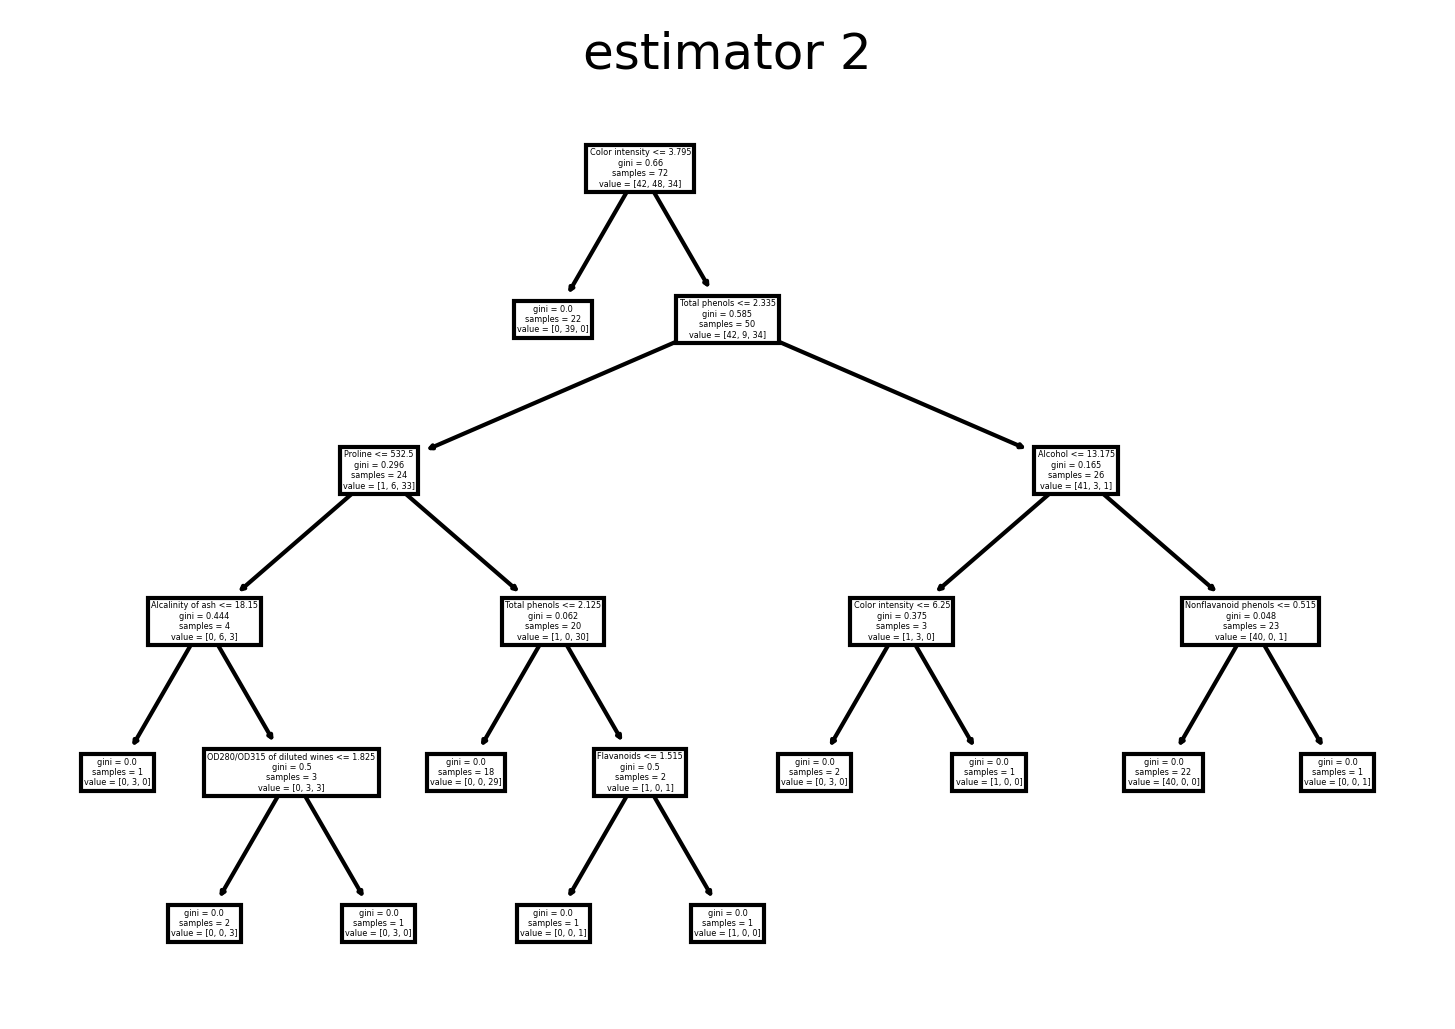

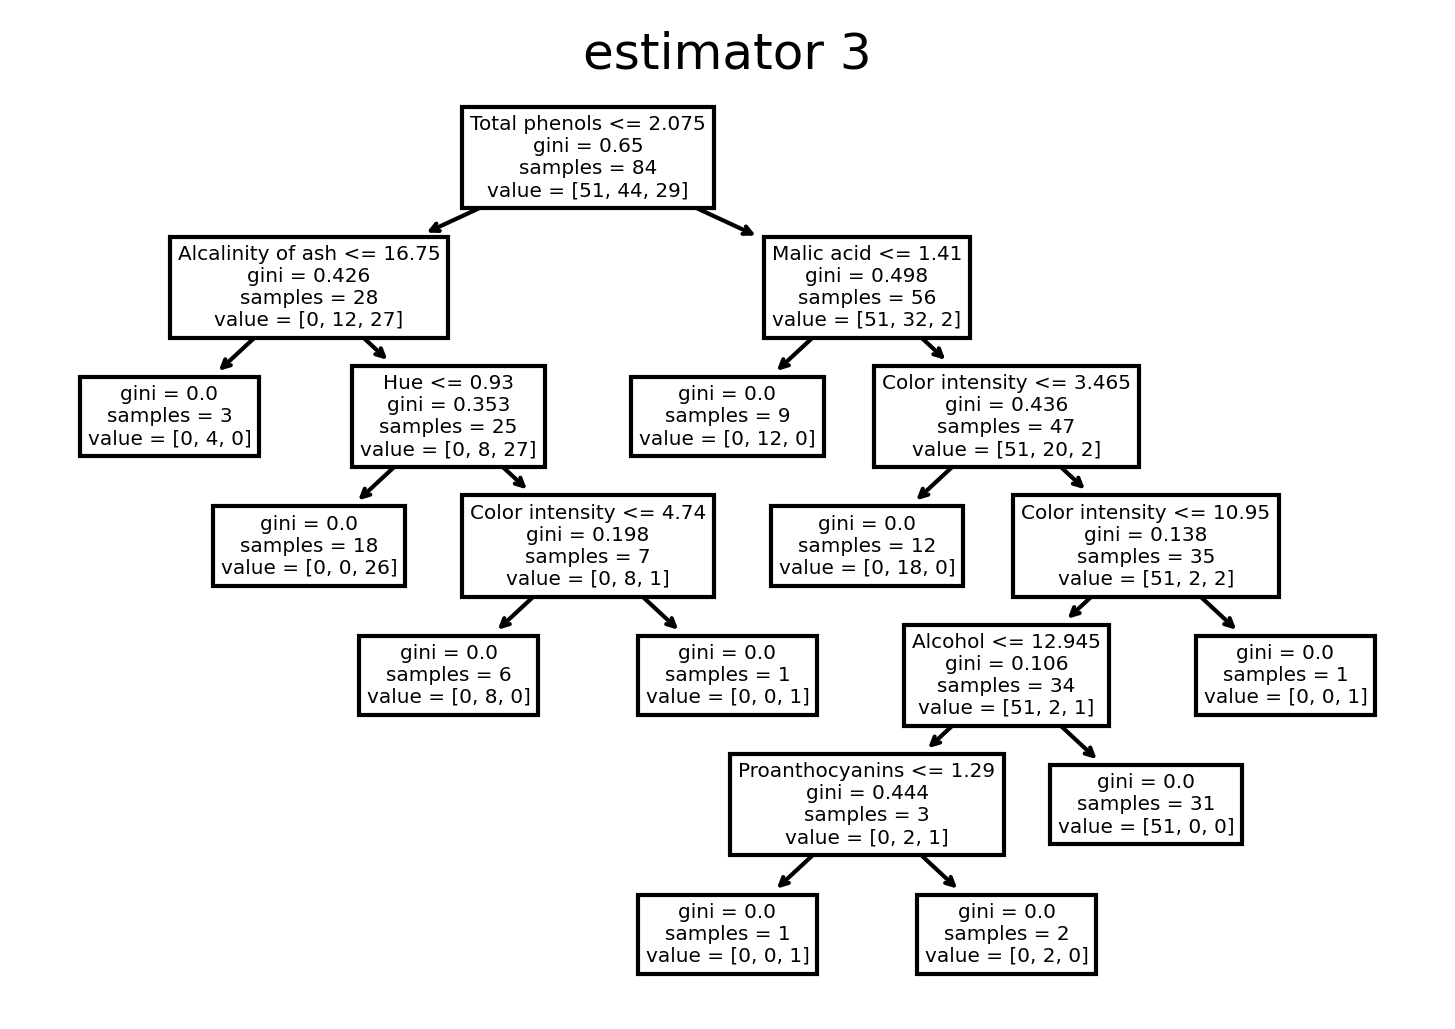

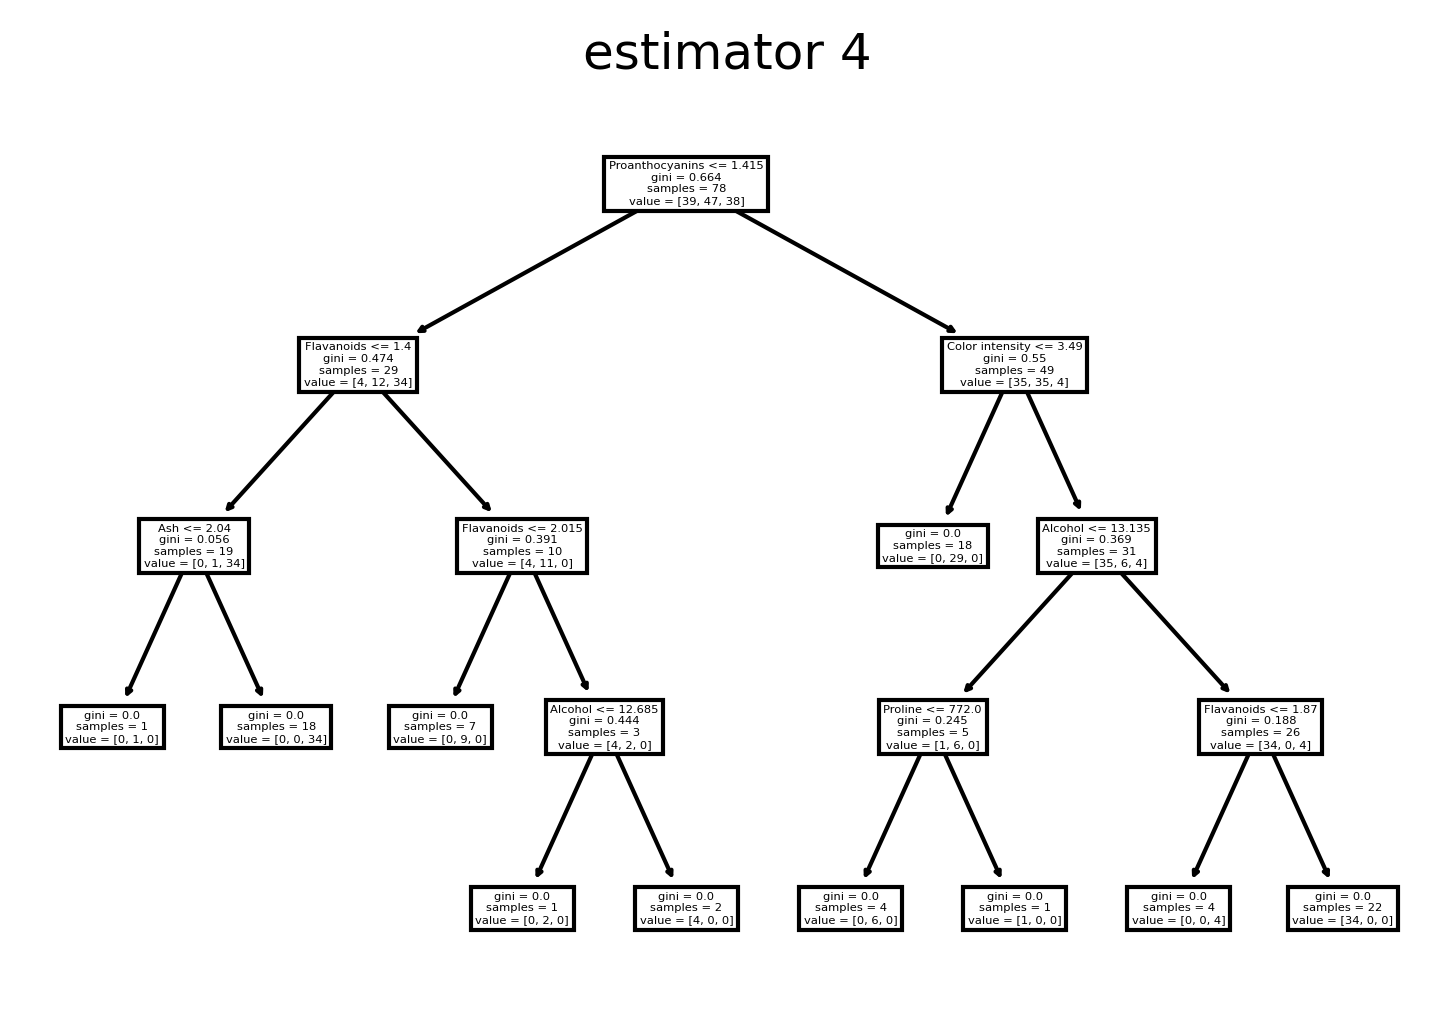

In [20]:
for i in range(5):
  plt.figure(dpi=300)
  estimator = forest.estimators_[i]
  tree.plot_tree(estimator, feature_names=df_wine.columns[1:])
  plt.title('estimator '+ str(i))  
  plt.show()
  #plt.savefig('/content/drive/My Drive/ML_DL_202002/estimator{}.png'.format(i))

여러개의 Decision Tree로부터 Feature의 중요도를 계산할 수 있습니다

In [21]:
imp=forest.feature_importances_

In [22]:
imp

array([0.13146708, 0.02265577, 0.01175876, 0.02352245, 0.03842641,
       0.05307269, 0.16183465, 0.02191746, 0.02850799, 0.15418285,
       0.05215297, 0.12944024, 0.17106068])

In [23]:
imp_df = pd.Series(imp, df_wine.columns[1:])

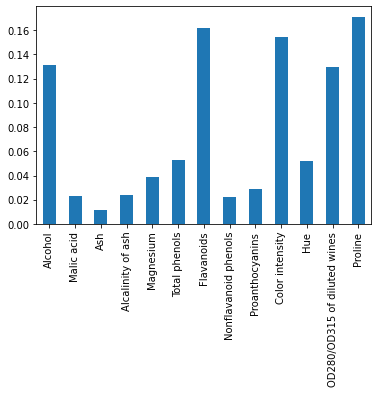

In [24]:
imp_df.plot.bar()

In [25]:
imp_df = imp_df.sort_values(ascending = False)

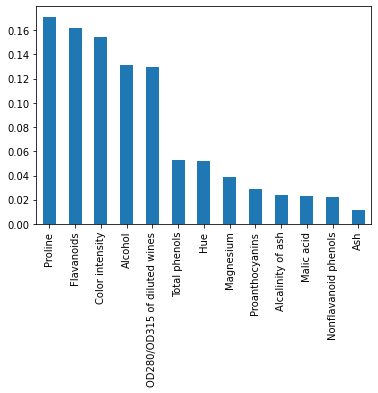

In [26]:
imp_df.plot.bar()